## Project 1: NYC Resteraunt Random Forest
### Jacob Minkin

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
sns.set_style('darkgrid')

%matplotlib inline

## Set-Up

In [22]:
#Import Data
df = pd.read_csv('Final_Data_Frame.csv').set_index('CAMIS')
df = pd.get_dummies(df, columns=['CUISINE', 'ZIPCODE', 'BORO', 'CBoard'])
X = df.loc[:, df.columns != 'Now_Crit']
y = df['Now_Crit']


## Split into Test and Train

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
forest = RandomForestClassifier(random_state=100)
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

In [28]:
predictions = forest.predict(X_test)


In [29]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8313665778454511


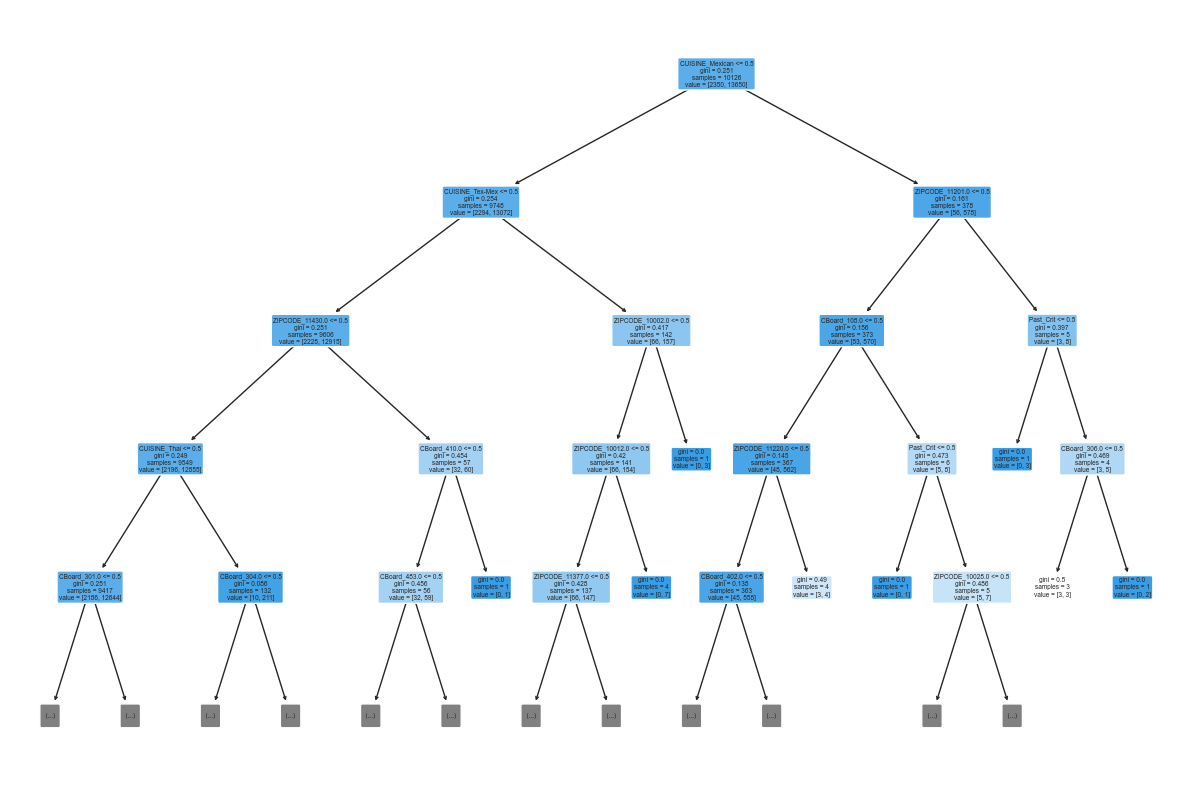

In [36]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(
          forest.estimators_[0], 
          max_depth = 4,
          feature_names=X.columns,
          filled=True, rounded=True)

plt.show()